In [92]:
# Load libraries to be used to perform the analysis and create the visualizations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [93]:
# Load the avocado dataset
df = pd.read_csv('avocado.csv')

# Check the first 5 rows of the dataset
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [94]:
# Drop the unnamed column
df.drop('Unnamed: 0', axis=1, inplace=True)

# Check the first 5 rows of the dataset
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [95]:
# Print the summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [96]:
# Print the summary statistics of the dataset
df.describe()


,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [97]:
# Set the date column as the index
df.set_index('Date', inplace=True)

# Check the first 5 rows of the dataset
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


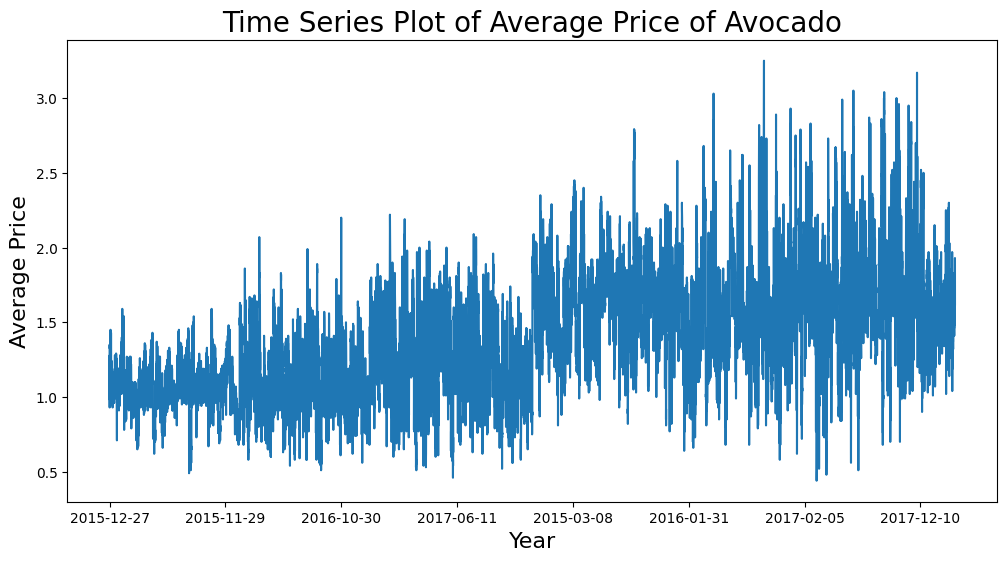

In [98]:
# Time series plot of the average price of avocado

# Set the figure size
plt.figure(figsize=(12,6))

# Plot the time series
df['AveragePrice'].plot()

# Set the title and labels
plt.title('Time Series Plot of Average Price of Avocado', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Average Price', fontsize=16)

# Show the plot
plt.show()

In [99]:
# Change the type of the index column to datetime
df.index = pd.to_datetime(df.index)

# Check the first 5 rows of the dataset
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [100]:
# Add total revenue column to the dataset by multiplying the average price and the total volume
df['TotalRevenue'] = df['AveragePrice'] * df['Total Volume']

# Check the first 5 rows of the dataset
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,TotalRevenue
Date,,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,85434.7046
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,74083.9230
2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,109944.8046
2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,85311.5220
2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,65330.6880


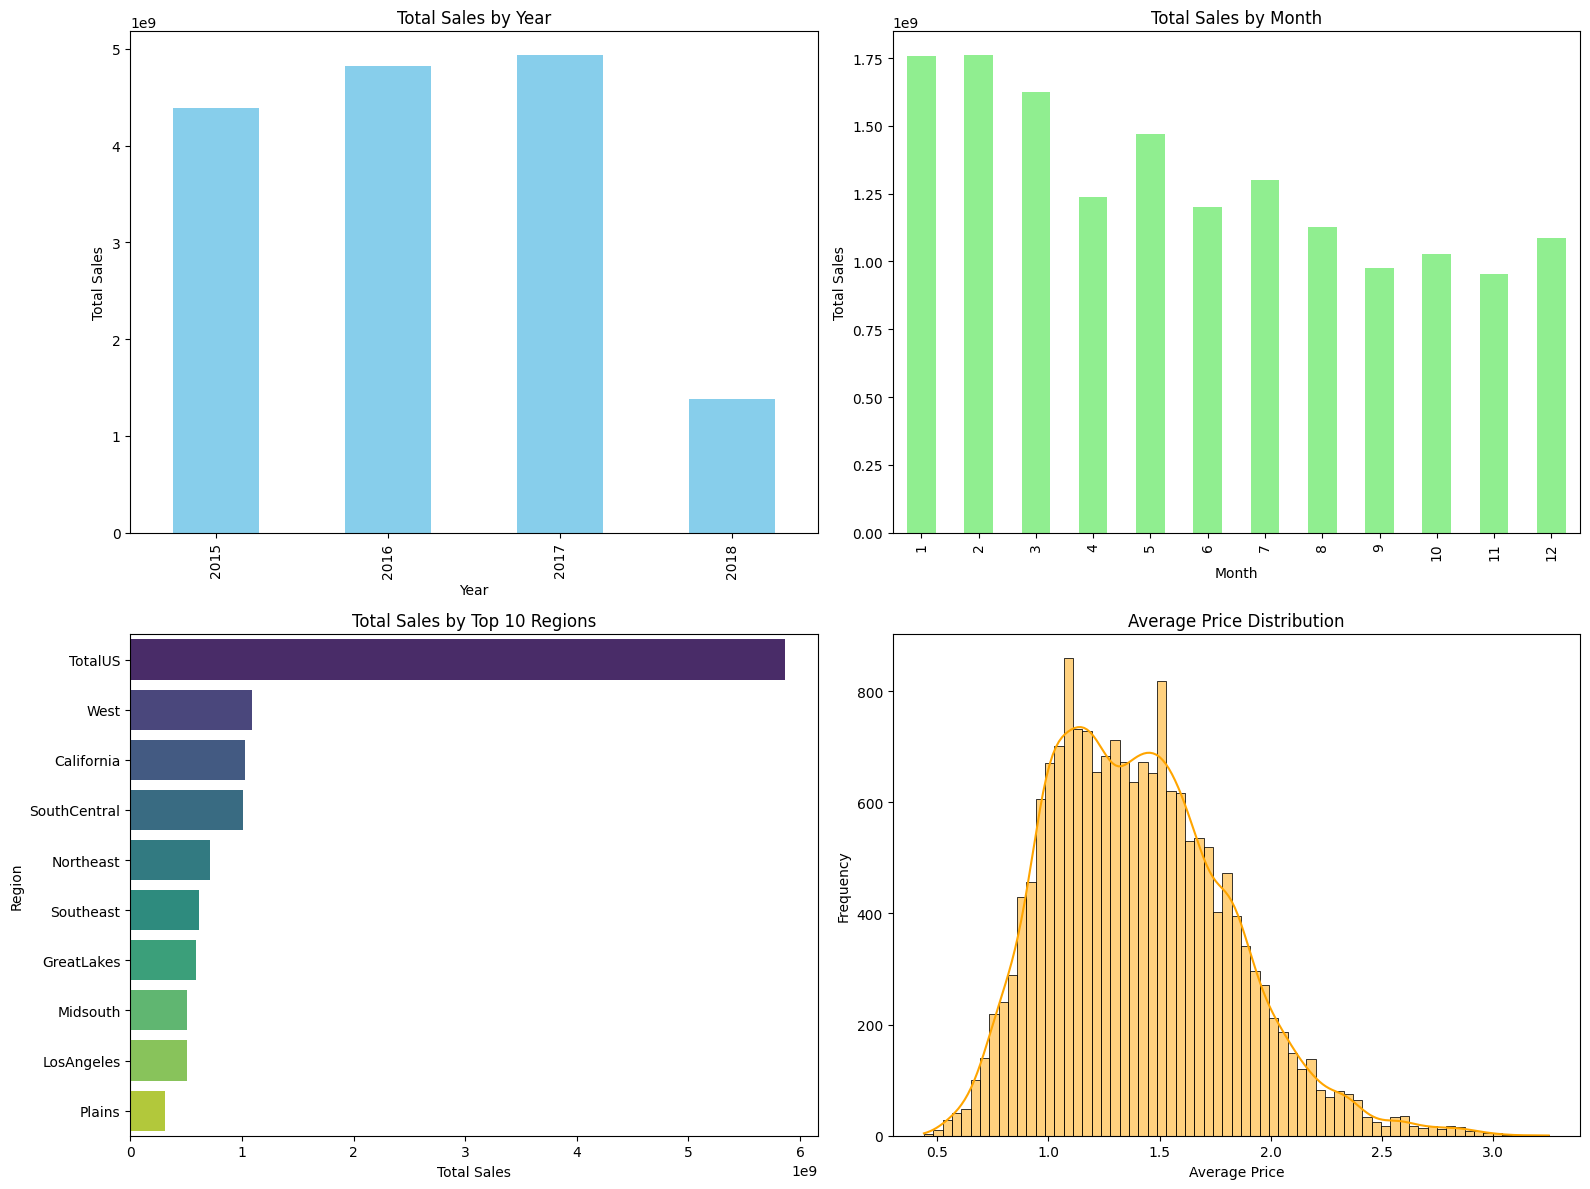

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the figure size for the dashboard
plt.figure(figsize=(16, 12))

# Sales by Year
plt.subplot(2, 2, 1)
sales_by_year = df.groupby(df['Date'].dt.year)['Total Volume'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Sales by Month
plt.subplot(2, 2, 2)
sales_by_month = df.groupby(df['Date'].dt.month)['Total Volume'].sum()
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Sales by Region
plt.subplot(2, 2, 3)
top_regions = df.groupby('region')['Total Volume'].sum().nlargest(10)
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Total Sales by Top 10 Regions')
plt.xlabel('Total Sales')
plt.ylabel('Region')

# Average Price Distribution
plt.subplot(2, 2, 4)
sns.histplot(data=df, x='AveragePrice', kde=True, color='orange')
plt.title('Average Price Distribution')
plt.xlabel('Average Price')
plt.ylabel('Frequency')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the dashboard
plt.show()


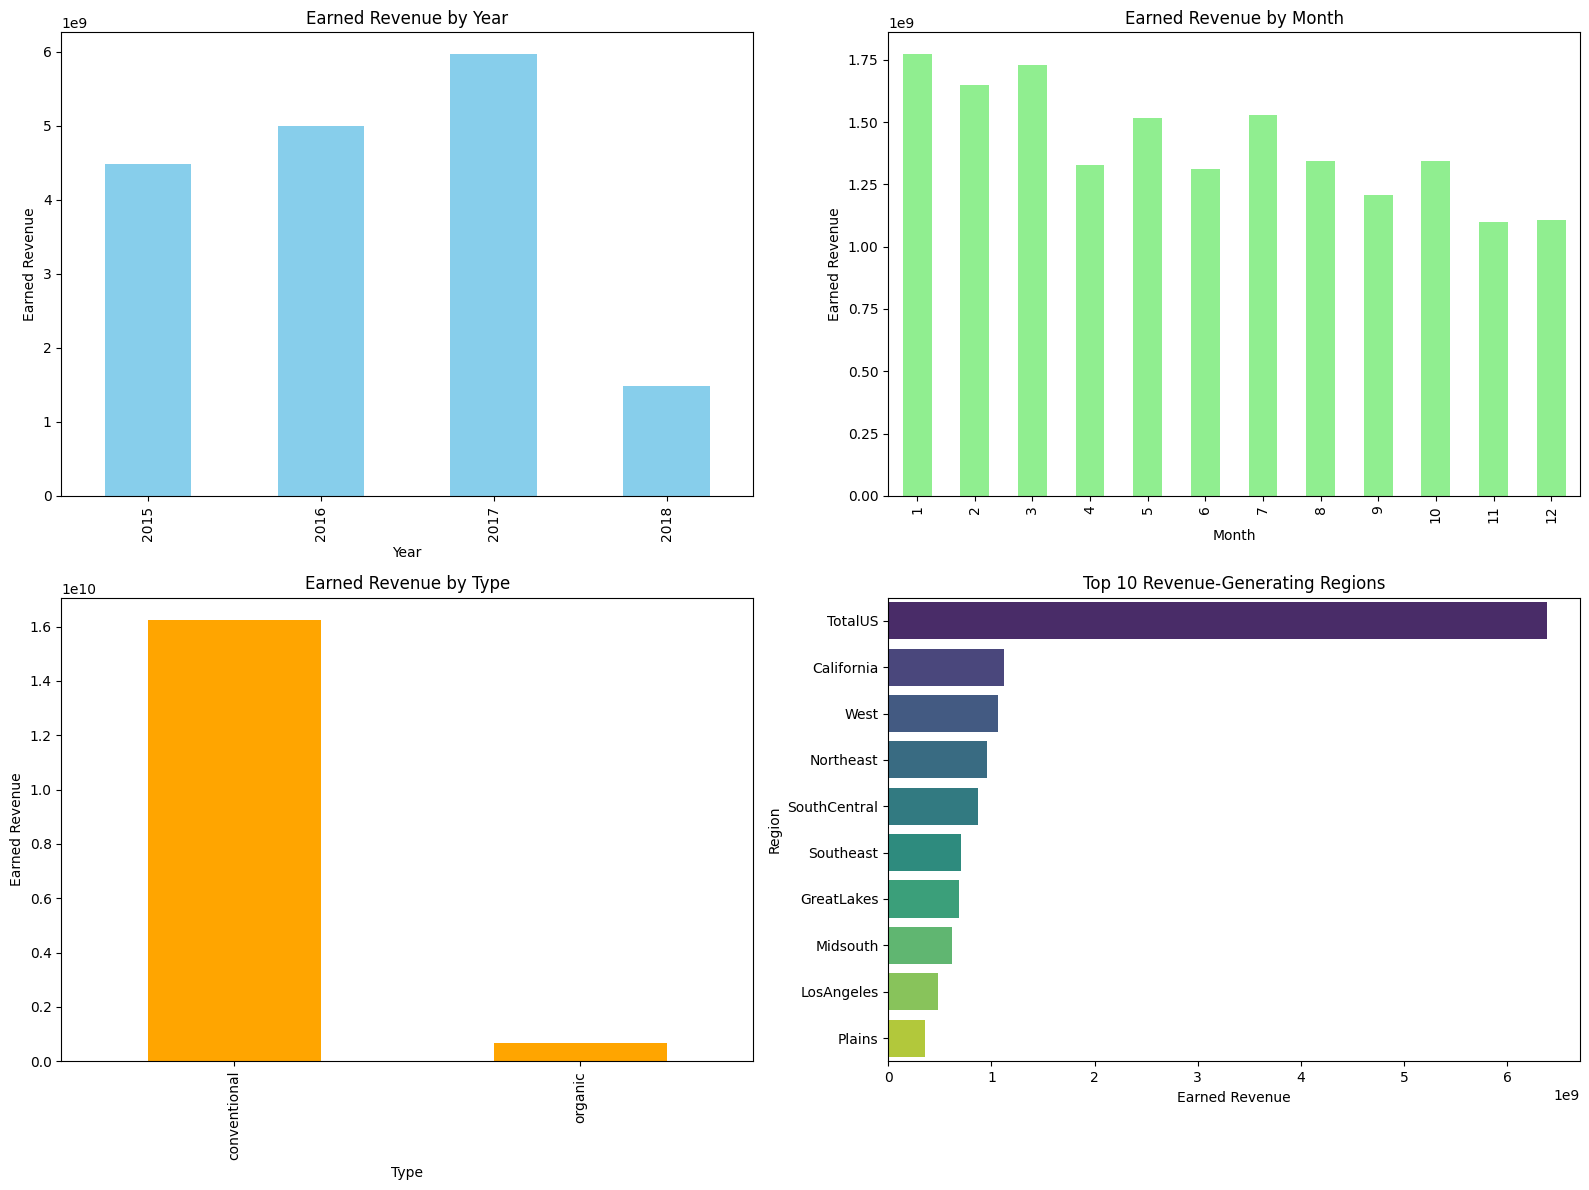

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Calculate the earned revenue by multiplying the average price with total volume
df['EarnedRevenue'] = df['AveragePrice'] * df['Total Volume']

# Earned Revenue by Year
earned_revenue_by_year = df.groupby(df['Date'].dt.year)['EarnedRevenue'].sum()

# Earned Revenue by Month
earned_revenue_by_month = df.groupby(df['Date'].dt.month)['EarnedRevenue'].sum()

# Earned Revenue by Region
earned_revenue_by_region = df.groupby('region')['EarnedRevenue'].sum()

# Earned Revenue by Type
earned_revenue_by_type = df.groupby('type')['EarnedRevenue'].sum()

# Top 10 revenue-generating regions
top_10_regions = earned_revenue_by_region.nlargest(10)

# Set the figure size for the visualizations
plt.figure(figsize=(16, 12))

# Earned Revenue by Year
plt.subplot(2, 2, 1)
earned_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Earned Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Earned Revenue')

# Earned Revenue by Month
plt.subplot(2, 2, 2)
earned_revenue_by_month.plot(kind='bar', color='lightgreen')
plt.title('Earned Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Earned Revenue')

# Earned Revenue by Type
plt.subplot(2, 2, 3)
earned_revenue_by_type.plot(kind='bar', color='orange')
plt.title('Earned Revenue by Type')
plt.xlabel('Type')
plt.ylabel('Earned Revenue')

# Top 10 revenue-generating regions
plt.subplot(2, 2, 4)
sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette='viridis')
plt.title('Top 10 Revenue-Generating Regions')
plt.xlabel('Earned Revenue')
plt.ylabel('Region')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the visualizations
plt.show()


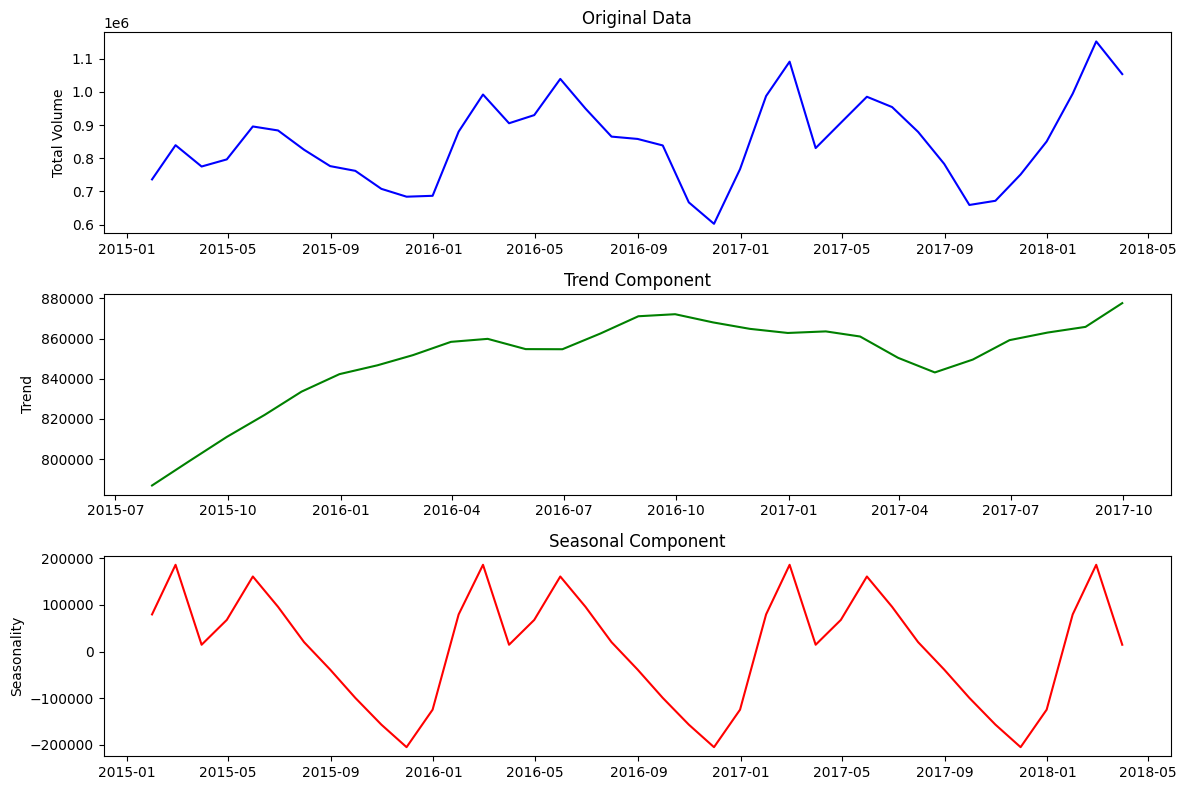

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Perform time series decomposition
decomposition = sm.tsa.seasonal_decompose(df_monthly['Total Volume'], model='additive')

# Set the figure size
plt.figure(figsize=(12, 8))

# Plot the original data
plt.subplot(3, 1, 1)
plt.plot(df_monthly.index, df_monthly['Total Volume'], color='blue')
plt.title('Original Data')
plt.ylabel('Total Volume')

# Plot the trend component
plt.subplot(3, 1, 2)
plt.plot(df_monthly.index, decomposition.trend, color='green')
plt.title('Trend Component')
plt.ylabel('Trend')

# Plot the seasonal component
plt.subplot(3, 1, 3)
plt.plot(df_monthly.index, decomposition.seasonal, color='red')
plt.title('Seasonal Component')
plt.ylabel('Seasonality')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


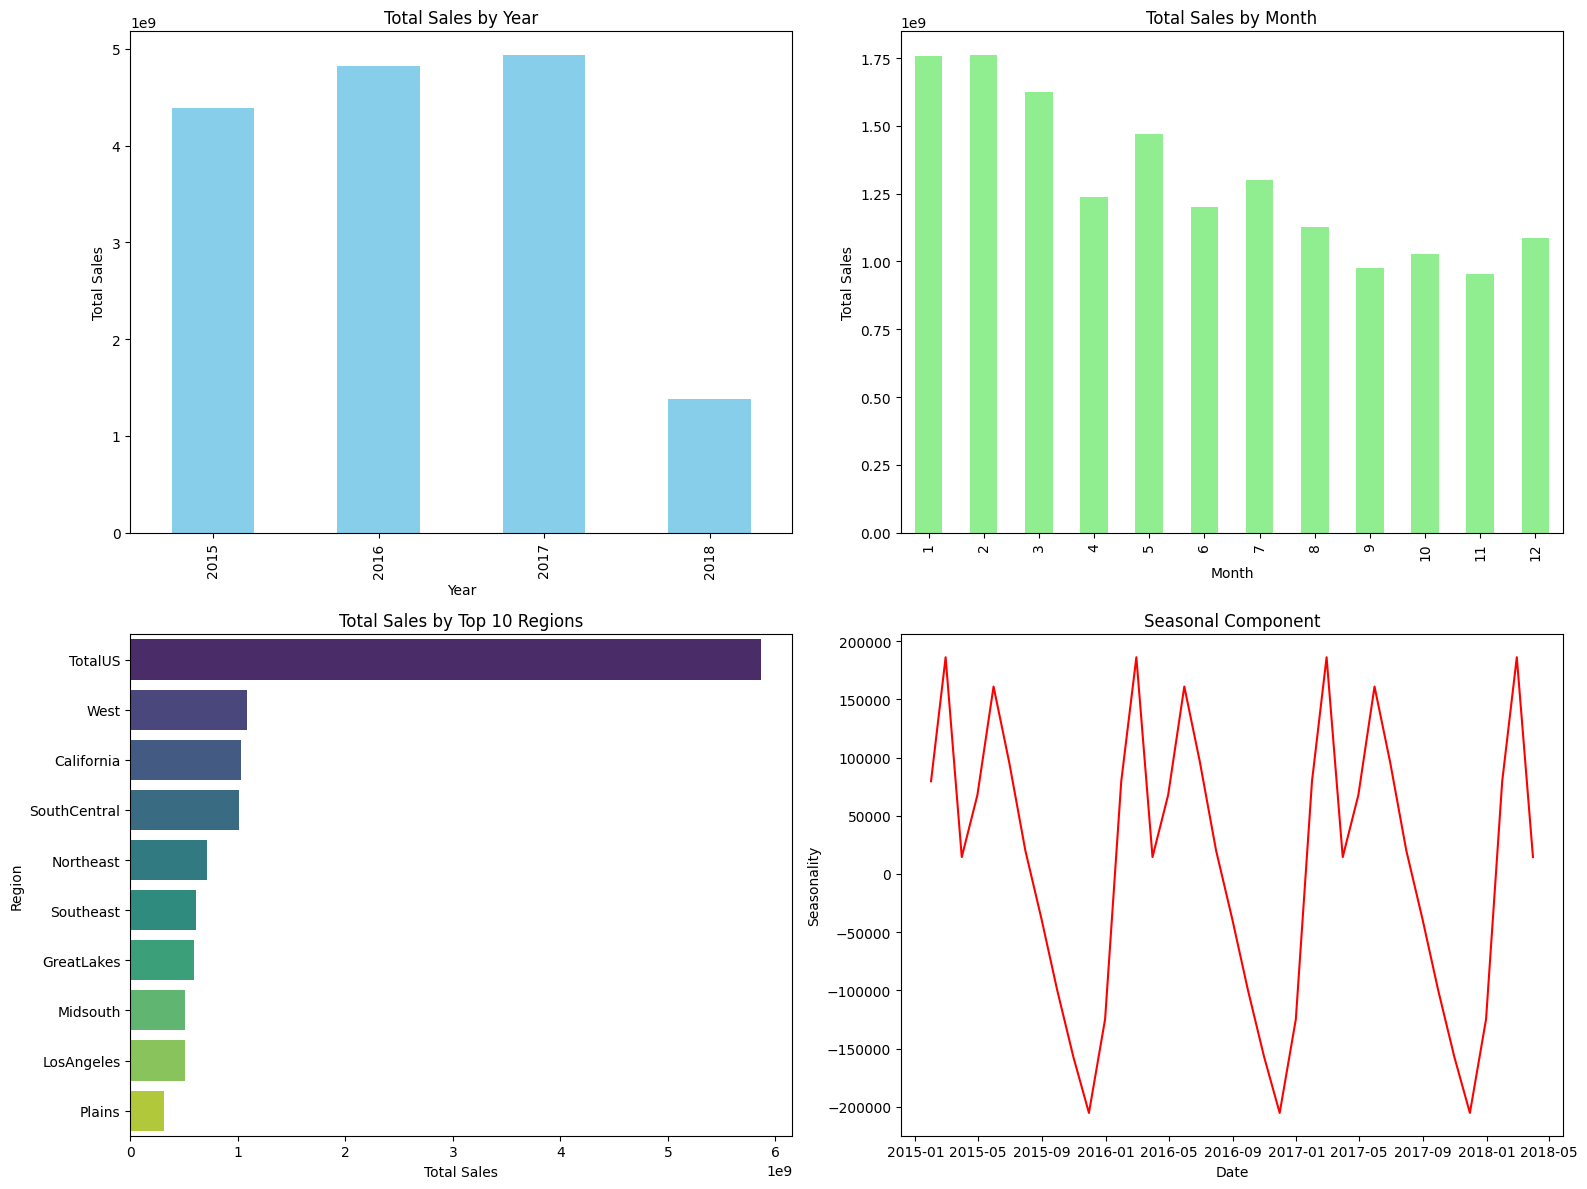

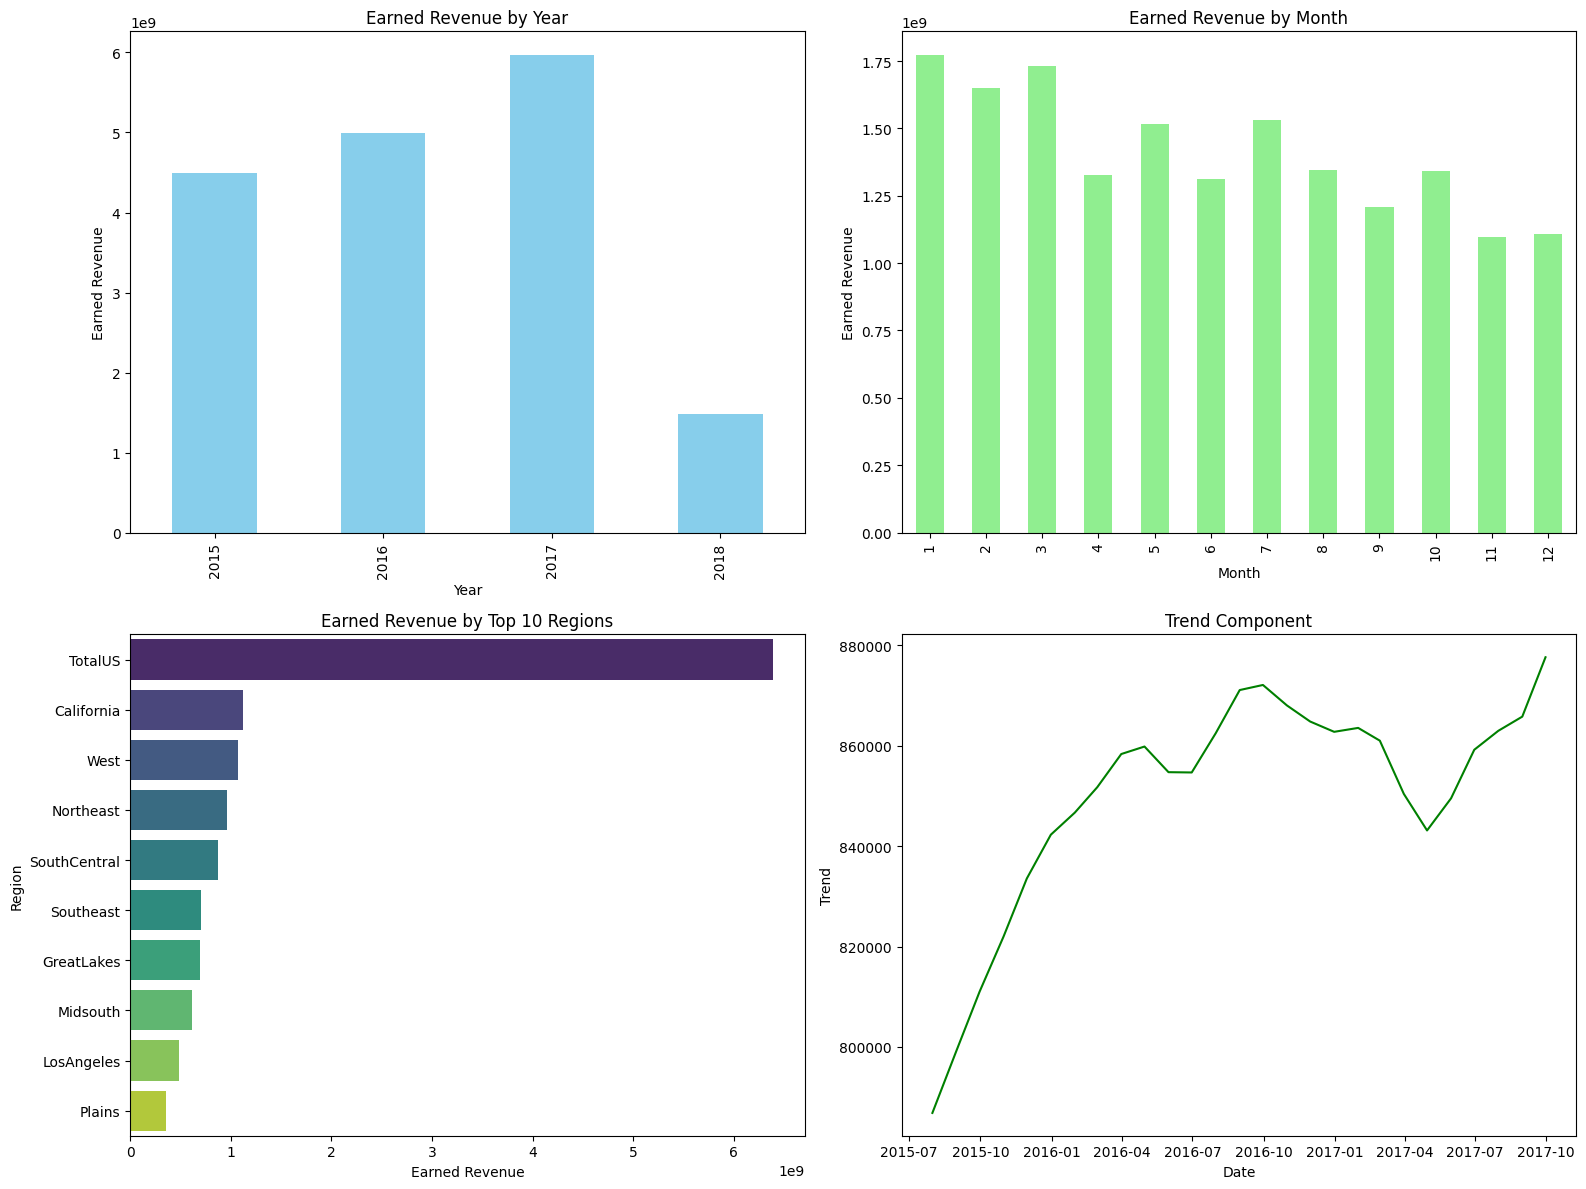

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set the figure size for the first dashboard
plt.figure(figsize=(16, 12))

# Dashboard 1 - Sales Analysis

# Total Sales by Year
plt.subplot(2, 2, 1)
sales_by_year = df.groupby(df.index.year)['Total Volume'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Total Sales by Month
plt.subplot(2, 2, 2)
sales_by_month = df.groupby(df.index.month)['Total Volume'].sum()
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Total Sales by Region
plt.subplot(2, 2, 3)
top_regions = df.groupby('region')['Total Volume'].sum().nlargest(10)
sns.barplot(x=top_regions.values, y=top_regions.index, palette='viridis')
plt.title('Total Sales by Top 10 Regions')
plt.xlabel('Total Sales')
plt.ylabel('Region')

# Seasonal Component
plt.subplot(2, 2, 4)
decomposition = sm.tsa.seasonal_decompose(df_monthly['Total Volume'], model='additive')
plt.plot(df_monthly.index, decomposition.seasonal, color='red')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the first dashboard
plt.show()

# Set the figure size for the second dashboard
plt.figure(figsize=(16, 12))

# Dashboard 2 - Revenue Analysis

# Add a new column to the DataFrame for earned revenue
df['EarnedRevenue'] = df['AveragePrice'] * df['Total Volume']

# Earned Revenue by Year
plt.subplot(2, 2, 1)
earned_revenue_by_year = df.groupby(df.index.year)['EarnedRevenue'].sum()
earned_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Earned Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Earned Revenue')

# Earned Revenue by Month
plt.subplot(2, 2, 2)
earned_revenue_by_month = df.groupby(df.index.month)['EarnedRevenue'].sum()
earned_revenue_by_month.plot(kind='bar', color='lightgreen')
plt.title('Earned Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Earned Revenue')

# Earned Revenue by Region
plt.subplot(2, 2, 3)
earned_revenue_by_region = df.groupby('region')['EarnedRevenue'].sum()
top_10_regions = earned_revenue_by_region.nlargest(10)
sns.barplot(x=top_10_regions.values, y=top_10_regions.index, palette='viridis')
plt.title('Earned Revenue by Top 10 Regions')
plt.xlabel('Earned Revenue')
plt.ylabel('Region')

# Trend Component
plt.subplot(2, 2, 4)
plt.plot(df_monthly.index, decomposition.trend, color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the second dashboard
plt.show()


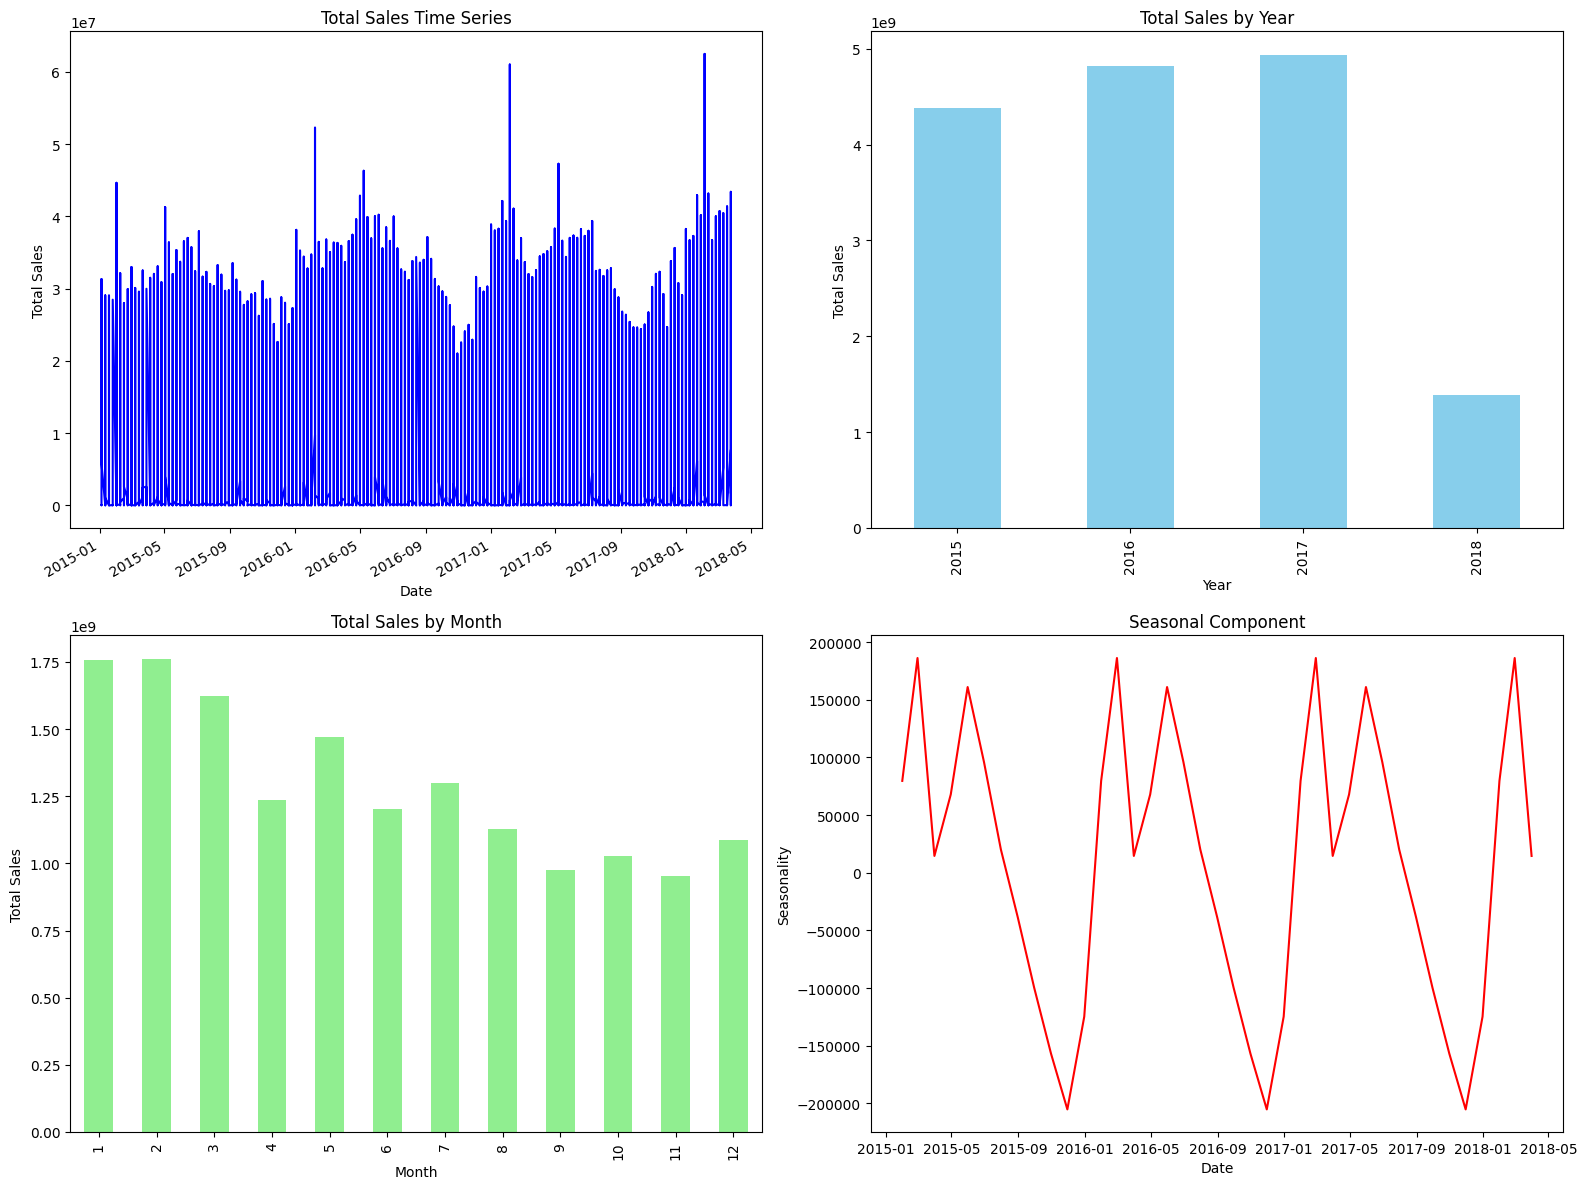

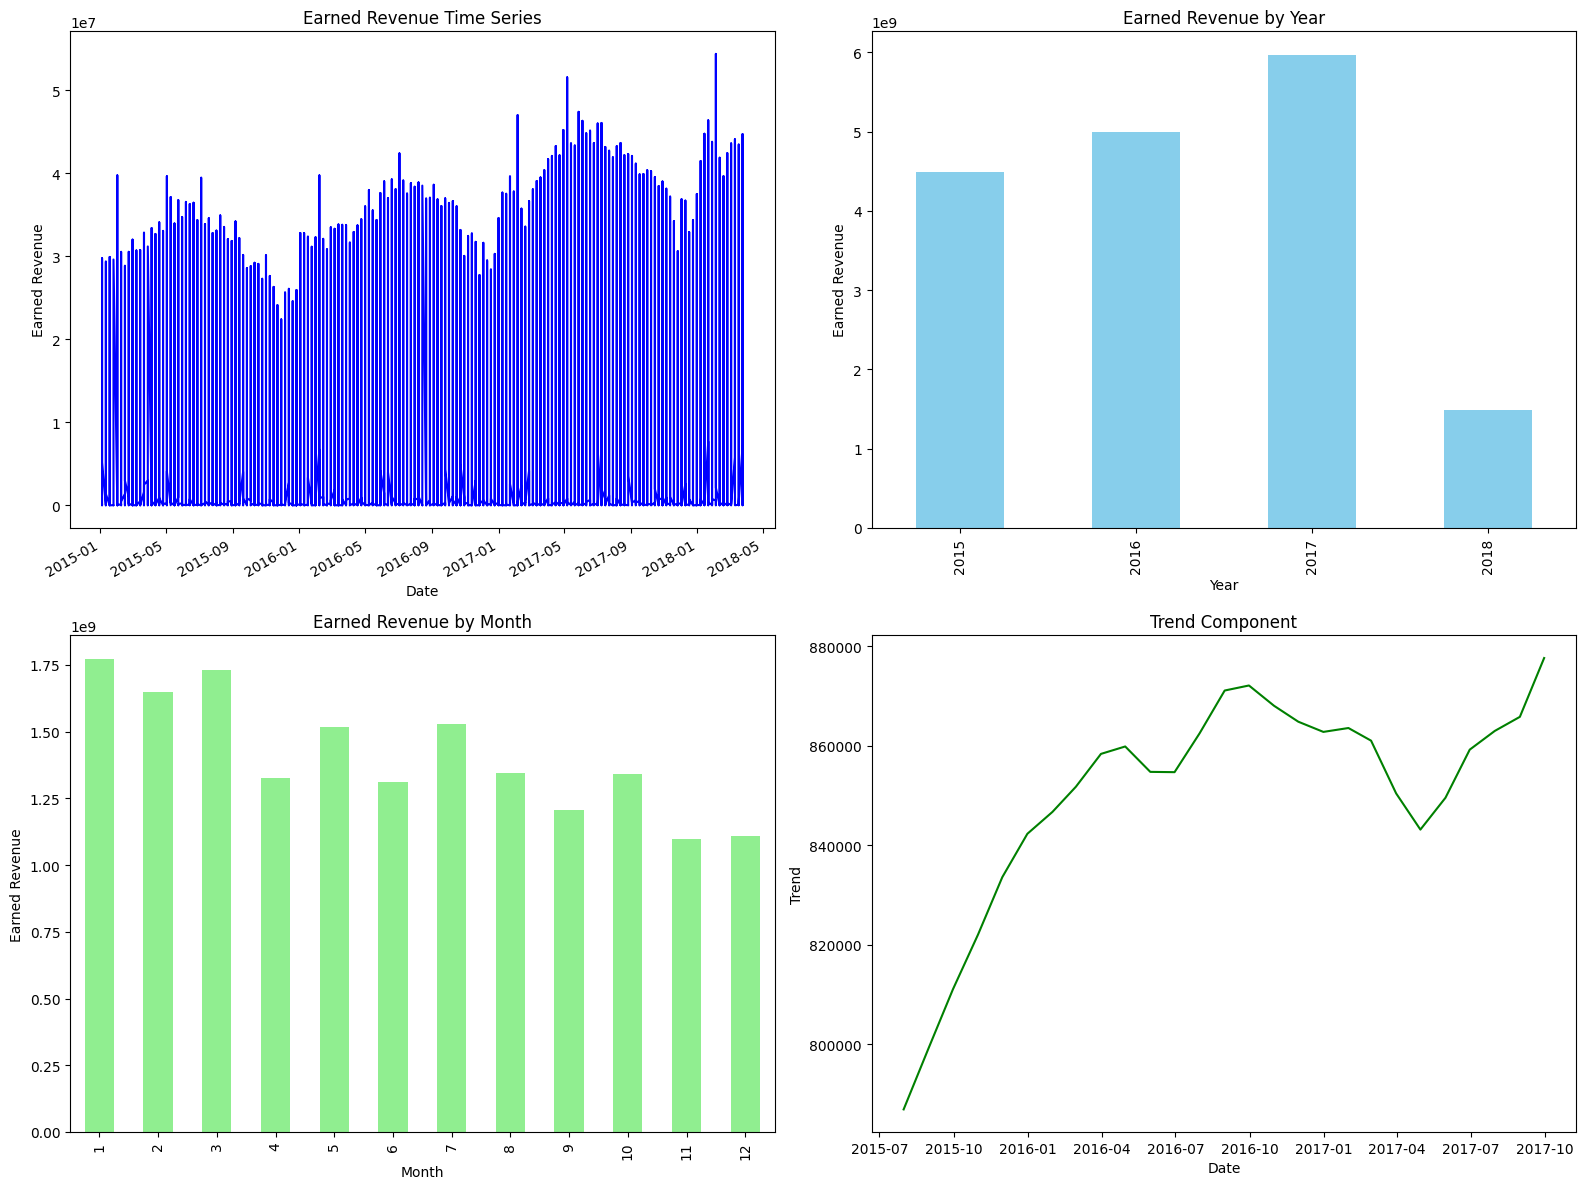

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv('avocado.csv')

# Convert the 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to monthly frequency
df_monthly = df.resample('M').mean()

# Set the figure size for the first dashboard
plt.figure(figsize=(16, 12))

# Dashboard 1 - Sales Analysis

# Total Sales Time Series
plt.subplot(2, 2, 1)
df['Total Volume'].plot(color='blue')
plt.title('Total Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Total Sales')

# Total Sales by Year
plt.subplot(2, 2, 2)
sales_by_year = df.groupby(df.index.year)['Total Volume'].sum()
sales_by_year.plot(kind='bar', color='skyblue')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

# Total Sales by Month
plt.subplot(2, 2, 3)
sales_by_month = df.groupby(df.index.month)['Total Volume'].sum()
sales_by_month.plot(kind='bar', color='lightgreen')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')

# Seasonal Component
plt.subplot(2, 2, 4)
decomposition = sm.tsa.seasonal_decompose(df_monthly['Total Volume'], model='additive')
plt.plot(df_monthly.index, decomposition.seasonal, color='red')
plt.title('Seasonal Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the first dashboard
plt.show()

# Set the figure size for the second dashboard
plt.figure(figsize=(16, 12))

# Dashboard 2 - Revenue Analysis

# Add a new column to the DataFrame for earned revenue
df['EarnedRevenue'] = df['AveragePrice'] * df['Total Volume']

# Earned Revenue Time Series
plt.subplot(2, 2, 1)
df['EarnedRevenue'].plot(color='blue')
plt.title('Earned Revenue Time Series')
plt.xlabel('Date')
plt.ylabel('Earned Revenue')

# Earned Revenue by Year
plt.subplot(2, 2, 2)
earned_revenue_by_year = df.groupby(df.index.year)['EarnedRevenue'].sum()
earned_revenue_by_year.plot(kind='bar', color='skyblue')
plt.title('Earned Revenue by Year')
plt.xlabel('Year')
plt.ylabel('Earned Revenue')

# Earned Revenue by Month
plt.subplot(2, 2, 3)
earned_revenue_by_month = df.groupby(df.index.month)['EarnedRevenue'].sum()
earned_revenue_by_month.plot(kind='bar', color='lightgreen')
plt.title('Earned Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Earned Revenue')

# Trend Component
plt.subplot(2, 2, 4)
plt.plot(df_monthly.index, decomposition.trend, color='green')
plt.title('Trend Component')
plt.xlabel('Date')
plt.ylabel('Trend')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the second dashboard
plt.show()
